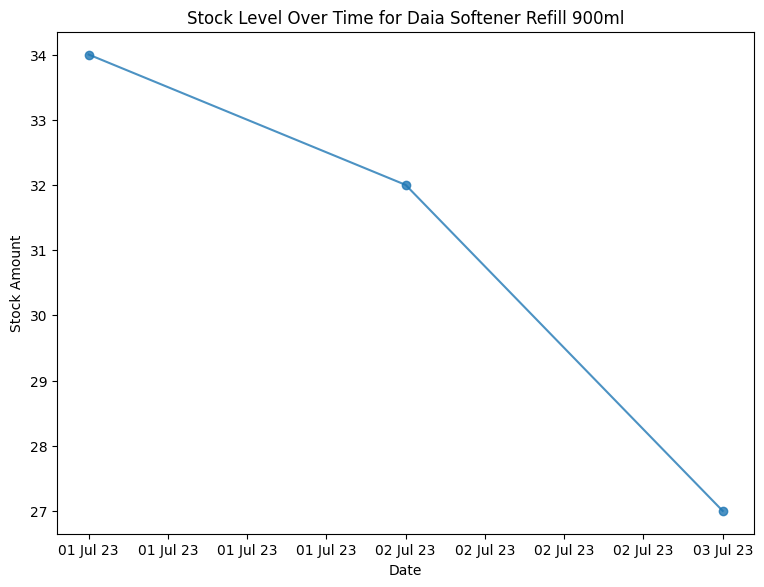

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.dates as mdates

# Load and preprocess data with EDA
def load_and_preprocess_data():
    try:
        # Load the product data
        product_data = pd.read_csv('22_product_quantities_random_restock_limited_no_stock.csv').set_index('Product')
        
        # Transpose the data and parse dates
        data_transposed = product_data.T
        data_transposed.index = pd.to_datetime(data_transposed.index)
        
        return data_transposed
    
    except FileNotFoundError:
        print("Error: The specified file could not be found.")
        return pd.DataFrame()
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred during data loading or preprocessing: {e}")
        return pd.DataFrame()

# Animate the graph based on selected product
def animate(i, ax, data_transposed, selected_product):
    ax.cla()  # Clear the axis to refresh it
    
    # After a product is selected, plot its stock data
    stock_data = data_transposed[selected_product.get()]
    ax.plot(stock_data.index[:i], stock_data.values[:i], marker='o', linestyle='-', alpha=0.8)
    ax.set_title(f'Stock Level Over Time for {selected_product.get()}')
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Amount")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %y'))

# Update function for animation upon product selection
def update_animation(fig, ax, data_transposed, selected_product, canvas):
    global anim
    if anim:
        anim.event_source.stop()  # Stop any previous animation
    anim = FuncAnimation(fig, animate, fargs=(ax, data_transposed, selected_product), frames=len(data_transposed.index), interval=500)
    canvas.draw()

# Main function to set up Tkinter and Matplotlib
def main():
    # Load data
    data_transposed = load_and_preprocess_data()
    if data_transposed.empty:
        print("No data available to display.")
        return

    # Tkinter setup
    root = tk.Tk()
    root.title("Stock Level Over Time")
    root.geometry("900x700")  # Set window size for the dashboard

    # Dropdown frame
    dropdown_frame = tk.Frame(root)
    dropdown_frame.pack(pady=10)

    # Variables and controls for selection
    selected_product = tk.StringVar(value=data_transposed.columns[0])  # Default product

    # Create dropdown in Tkinter
    dropdown_label = tk.Label(dropdown_frame, text="Select Product to view stock:")
    dropdown_label.pack(side=tk.LEFT, padx=5)
    dropdown = ttk.Combobox(dropdown_frame, textvariable=selected_product, values=list(data_transposed.columns))
    dropdown.pack(side=tk.LEFT)

    # Set up the figure and axis for Matplotlib
    fig, ax = plt.subplots(figsize=(10, 5))

    # Embed Matplotlib figure in Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    # Initial title and labels for the axis
    ax.set_title('Stock Level Over Time by Product')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Amount')

    # Initialize animation variable
    global anim
    anim = None

    # Link the update function to the dropdown selection
    selected_product.trace("w", lambda *args: update_animation(fig, ax, data_transposed, selected_product, canvas))

    # Run the Tkinter main loop without plt.show()
    root.mainloop()

# Run the main function
if __name__ == "__main__":
    main()